## Linear Regression with California Housing

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
from sklearn.datasets import fetch_california_housing

In [13]:
housing = fetch_california_housing()

In [14]:
# housing seems to be a dictionary
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [15]:
#convert housing to pandas dataframe
california = pd.DataFrame(housing.data, columns=housing.feature_names)

The data contains 9 predictor variables:
MedInc: average income
HouseAge: housing average income
AveRooms: average rooms
AveBedrms: average bedrooms
Population: population
AveOccup: average occupation
Latitude: latitude
Longitude: longitude

http://lib.stat.cmu.edu/datasets/




In [16]:
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


New column with target values, added to the dataframe. The target is median value of homes in value of $1000.

In [20]:
california['MedV'] = housing.target

In [21]:
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Data Cleaning

In [24]:
# no missing values in the columns
california.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MedV          0
dtype: int64

# Data Visualization

In [37]:
sns.set(rc={'figure.figsize':(15,10)})

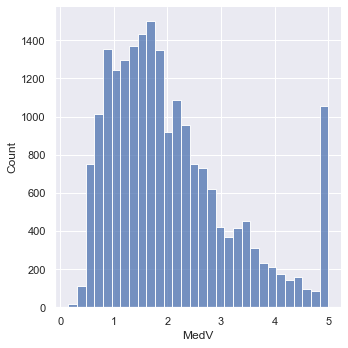

In [38]:
# Distribution of target values
sns.displot(california['MedV'],bins=30
            )
plt.show()

In [41]:
# correlation matrix
correlation_matrix = california.corr().round(2)

<AxesSubplot:>

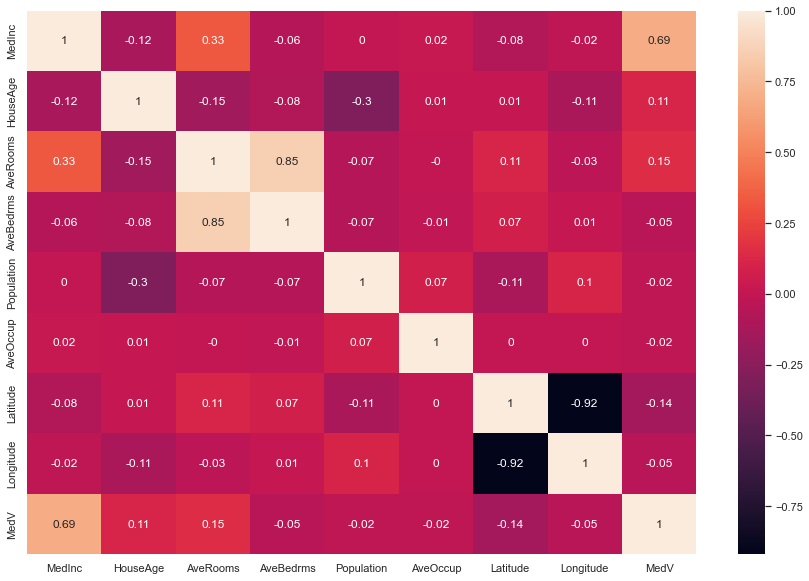

In [42]:
sns.heatmap(data=correlation_matrix, annot=True)

## Observations of heatmap

From the heatmap, we see that AveBedrms and AveRooms are highly correlated with 0.85. This is true
since bedrooms are a part of total room amounts.

There's a strong positive correlation with MedV and MedInc with 0.69. This means that median income that is high income tend to have higher house values. This also includes AveRooms with 0.15.


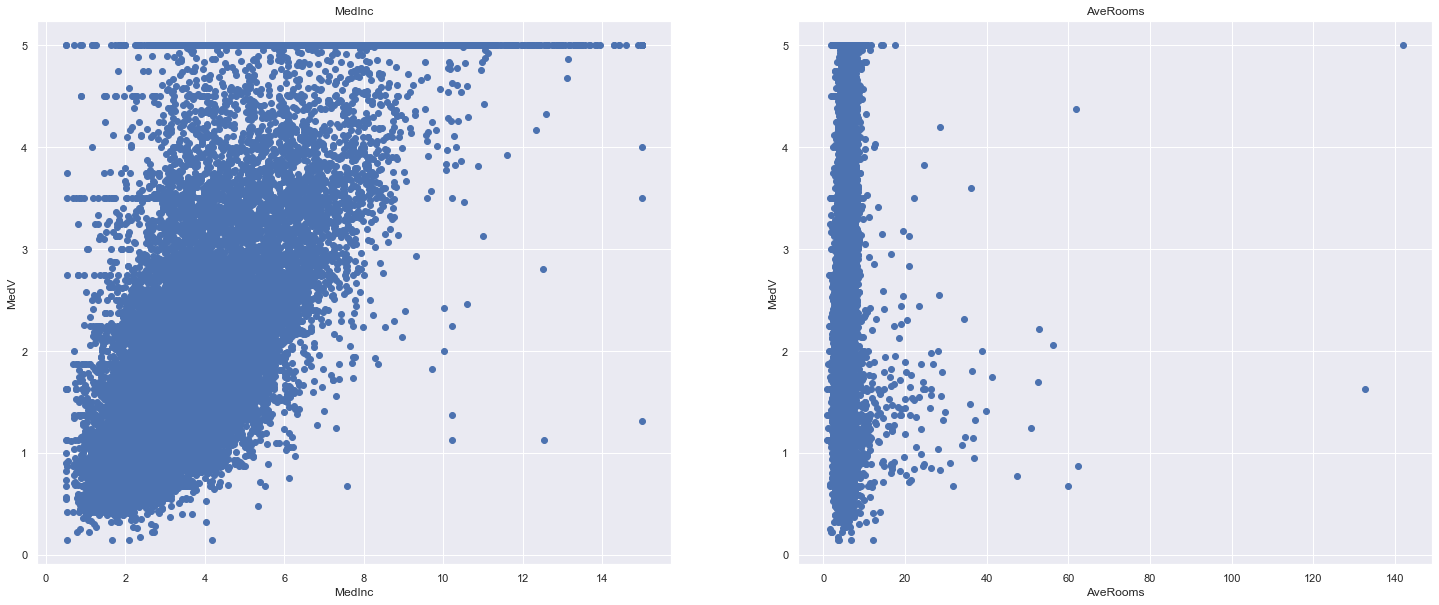

In [47]:
# Lets plot with MedV and MedInc
plt.figure(figsize=(25,10))
features = ['MedInc', 'AveRooms']
target = california['MedV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = california[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MedV')

In [48]:
#training data

X = pd.DataFrame(np.c_[california['MedInc'], california['AveRooms']], columns = ['MedInc','AveRooms'])
Y = california['MedV']

In [49]:
from sklearn.model_selection import train_test_split
#split data into training 80% and test sets 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [53]:
#train model with Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [54]:
#model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.8317685105583229
R2 score is 0.4756445698174918




In [56]:
#model evaluation for test set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 0.8360370094765345
R2 score is 0.49339279190200946




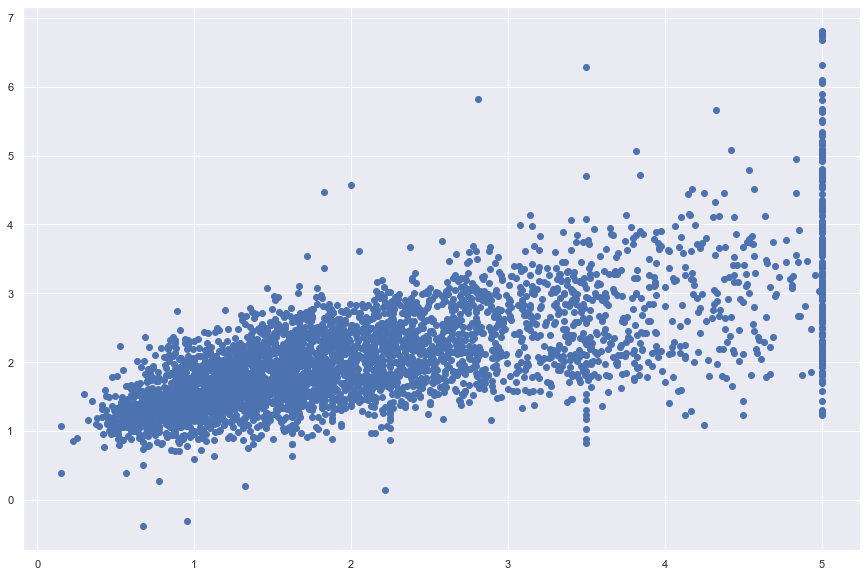

In [57]:
#plot y_test against y_pred
plt.scatter(Y_test, y_test_predict)
plt.show()